# 선형 회귀를 이용한 StackOverflow의 질문 수 예측

Dataset : MLTollsStackOverflow.csv (2009년 ~ 2019년 까지의 월별 stackoverflow 질문 수 데이터)

출처 : https://www.kaggle.com/aishu200023/stackindex

### 연구 배경
StackOverflow는 컴퓨터 공학 전공자들이 애용하는 대표적인 사이트 중 하나로 프로그래밍을 하기위한 지식 또는 에러, 심지어는 코드에 대한 직접적인 질문도 올라오는 사이트 중 하나입니다.
이곳에 올라오는 질문 수를 통해 얼마나 컴퓨터공학 또는 프로그램밍에 대한 사람들의 관심이 높아져 왔는지를 확인할 수 있다고 생각하여 본 프로젝트를 준비해 보았습니다.

In [44]:
import numpy as np
import pandas as pd
import time
import datetime

In [64]:
# data load
df = pd.read_csv("MLTollsStackOverflow.csv")
df.head()

,month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,...,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
0,09-Jan,0,0,0,631,8,6,2,19,8,...,0,1,0,0,5,0,0,5,0,0
1,09-Feb,1,0,0,633,9,7,3,27,4,...,0,0,0,0,5,0,0,11,0,0
2,09-Mar,0,0,0,766,4,4,2,24,3,...,0,0,0,0,7,0,0,2,0,0
3,09-Apr,0,0,0,768,12,6,3,32,10,...,0,0,0,0,11,0,0,5,0,0
4,09-May,1,0,0,1003,2,7,2,42,7,...,0,0,0,0,10,0,0,3,0,0


In [63]:
# 데이터 전처리
def process_month(date: str):
    # 선형회귀를 하기 위해서 timestamp data가 필요함
    month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    for idx, m_str in enumerate(month):
        date = date.replace(m_str, str(idx+1))
    return time.mktime(datetime.datetime.strptime(date, "%y-%m").timetuple())

month = df["month"]
month_timestamp = df['month'].apply(process_month)
questions = df.iloc[:,1:].sum(axis=1) # 질문들의 수를 다 더해준다.
processed_df = pd.concat([month, month_timestamp, questions], axis=1, keys=["month", "month_timestamp", "questions"])
processed_df.head()

,month,month_timestamp,questions
0,09-Jan,1.230736e+09,832.0
1,09-Feb,1.233414e+09,893.0
2,09-Mar,1.235833e+09,1001.0
3,09-Apr,1.238512e+09,1053.0
4,09-May,1.241104e+09,1323.0


<AxesSubplot:xlabel='month'>

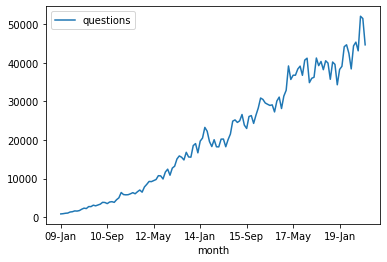

In [51]:
# 월별 질문 수 그래프
processed_df.plot(x="month", y="questions")

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [60]:
# 데이터 셋 만들기
x_train, x_valid, y_train, y_valid = train_test_split(processed_df.drop(["questions", "month"], axis=1), processed_df.questions)


print("train set shape :", x_train.shape, y_train.shape)
print("validation set shape :", x_valid.shape, y_valid.shape)

train set shape : (99, 1) (99,)
validation set shape : (33, 1) (33,)


In [61]:
lr = LinearRegression().fit(x_train, y_train)
print('train set score :', lr.score(x_train, y_train))
print("validation set score :", lr.score(x_valid, y_valid))
print('coef: ',lr.coef_, lr.intercept_)

train set score : 0.969911134555689
validation set score : 0.9755388372818012
coef:  [0.00014005] -175573.60941646266


# 결과 확인

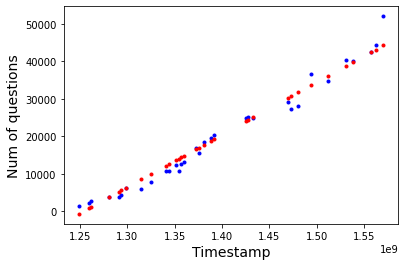

In [62]:
from matplotlib import pyplot as plt
# 예측
y_pred = lr.predict(x_valid)

plt.plot(x_valid, y_valid, "b.",label="실제값")
plt.plot(x_valid, y_pred, "r.",label="예측값")
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Num of questions', fontsize=14)
plt.show()